# Pandas 이어서


- concat ( objects, axis = 0 or 1) 

In [1]:
import pandas as pd
df= pd.read_csv("studentlist.csv", encoding="cp949")


In [2]:
df2 = df[1:3]   # 2개 column
df2

,name,sex,age,grade,absence,bloodtype,height,weight,dept
1,이미린,여자,22,2,무,AB,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,80.1,1


In [3]:
df2 = df[1:3]   # 2개 column
df3 = df[5:8]
df4 = pd.concat([df2, df3], axis=0)  #series끼리 합치기
df4

,name,sex,age,grade,absence,bloodtype,height,weight,dept
1,이미린,여자,22,2,무,AB,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,80.1,1
5,박미희,여자,21,2,무,O,162.0,52.0,3
6,강수친,여자,22,1,무,O,155.2,45.3,2
7,이희수,여자,23,1,무,A,176.9,55.0,1


In [4]:
df2= df[["age", "grade"]]
df3= df[["height", "weight"]]
df4=pd.concat([df2, df3], axis=1)
df4

,age,grade,height,weight
0,23,3,165.3,68.2
1,22,2,170.1,53.0
2,24,4,175.0,80.1
3,23,3,182.1,85.7
4,20,1,168.0,49.5
5,21,2,162.0,52.0
6,22,1,155.2,45.3
7,23,1,176.9,55.0
8,23,3,178.5,64.2
9,22,2,176.1,61.3


- merge (A, B, on=키 ) :  기본은 inner join

In [5]:
dff= pd.read_csv("footsize.csv", encoding="cp949")
dff

,name2,footsize
0,강수친,245
1,김길동,270
2,김동수,265
3,김미진,235
4,김민수,270
5,김철수,280
6,박미희,240
7,박수호,280
8,방희철,275
9,손세수,240


In [6]:
df3= pd.merge(df, dff, left_on='name', right_on='name2')
df3

,name,sex,age,grade,absence,bloodtype,height,weight,dept,name2,footsize
0,김길동,남자,23,3,유,O,165.3,68.2,2,김길동,270
1,이미린,여자,22,2,무,AB,170.1,53.0,3,이미린,245
2,김철수,남자,23,3,무,AB,182.1,85.7,2,김철수,280
3,손세수,여자,20,1,유,A,168.0,49.5,1,손세수,240
4,박미희,여자,21,2,무,O,162.0,52.0,3,박미희,240
5,강수친,여자,22,1,무,O,155.2,45.3,2,강수친,245
6,이희수,여자,23,1,무,A,176.9,55.0,1,이희수,245
7,이철린,남자,23,3,무,B,178.5,64.2,1,이철린,260
8,방희철,남자,22,2,무,B,176.1,61.3,3,방희철,275
9,박수호,남자,24,4,유,O,167.1,62.0,3,박수호,280


### grouping

- groupby

In [9]:
df.groupby("grade").mean()

,age,height,weight,dept
grade,,,,
1,21.4,166.300000,53.460000,1.400000
2,21.8,169.280000,57.460000,3.000000
3,23.0,175.500000,67.800000,1.750000
4,24.0,170.233333,70.766667,1.666667


### numeric vs. nominal 

- data type 변환 : astype("새 type")

  예) df["dept"]=df["dept"].astype('str')
  
  
- data type 조회 : df.dtypes


In [10]:
df.dtypes

name          object
sex           object
age            int64
grade          int64
absence       object
bloodtype     object
height       float64
weight       float64
dept           int64
dtype: object

In [11]:
df["dept"] = df["dept"].astype('object')

In [12]:
df.groupby(["sex","bloodtype"]).mean()

age  grade      height     weight
sex bloodtype                                     
남자  A          21.00   1.00  165.700000  58.750000
    AB         22.50   2.50  181.050000  80.750000
    B          23.25   3.25  174.550000  68.950000
    O          23.50   3.50  166.200000  65.100000
여자  A          21.50   1.00  172.450000  52.250000
    AB         22.00   2.00  170.100000  53.000000
    B          22.00   2.00  158.200000  45.200000
    O          22.00   2.00  164.433333  50.133333

In [49]:
df.groupby(["sex","bloodtype"]).size()

sex  bloodtype
남자   A            2
     AB           2
     B            4
     O            2
여자   A            2
     AB           1
     B            1
     O            3
dtype: int64

## 과제 4 : 각 사람의 BMI ( 몸무게 kg /  (키 m ^2) )를 구하여 column을 추가하시오


In [50]:
df['BMI'] = df['weight']/pow(df['height']/100,2)
df

,name,sex,age,grade,absence,bloodtype,height,weight,dept,BMI
0,김길동,남자,23,3,유,O,165.3,68.2,2,24.959660
1,이미린,여자,22,2,무,AB,170.1,53.0,3,18.317544
2,홍길동,남자,24,4,무,B,175.0,80.1,1,26.155102
3,김철수,남자,23,3,무,AB,182.1,85.7,2,25.844071
4,손세수,여자,20,1,유,A,168.0,49.5,1,17.538265
5,박미희,여자,21,2,무,O,162.0,52.0,3,19.814053
6,강수친,여자,22,1,무,O,155.2,45.3,2,18.806794
7,이희수,여자,23,1,무,A,176.9,55.0,1,17.575473
8,이철린,남자,23,3,무,B,178.5,64.2,1,20.149236
9,방희철,남자,22,2,무,B,176.1,61.3,3,19.767046


### column 이름 변경 

df.rename ( columns={기존이름:새이름}, inplace=True)


In [51]:
df.rename ( columns={'sex':'gender'}, inplace=True)

df.columns

Index(['name', 'gender', 'age', 'grade', 'absence', 'bloodtype', 'height',
       'weight', 'dept', 'BMI'],
      dtype='object')

# matplotlib

## 기본 내용

plt.plot ( x축 데이터, y축 데이터 )


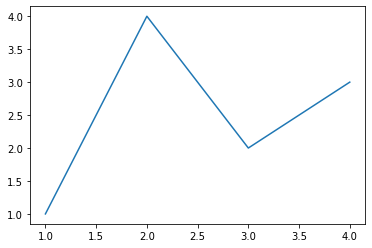

In [1]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.


## input data 형식 

numpy array 이어야 함

pandas column도 가능

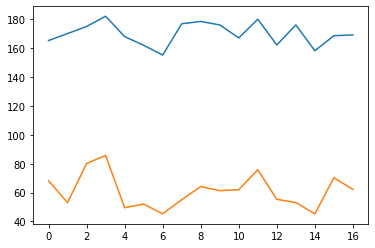

In [15]:
plt.plot( df[["height", "weight"]] )

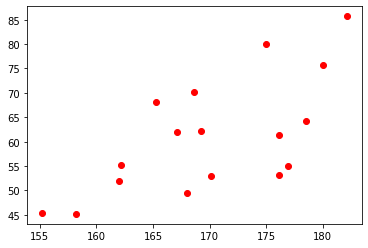

In [16]:
plt.plot( df["height"], df["weight"] , 'ro')

##  figure의 구성요소

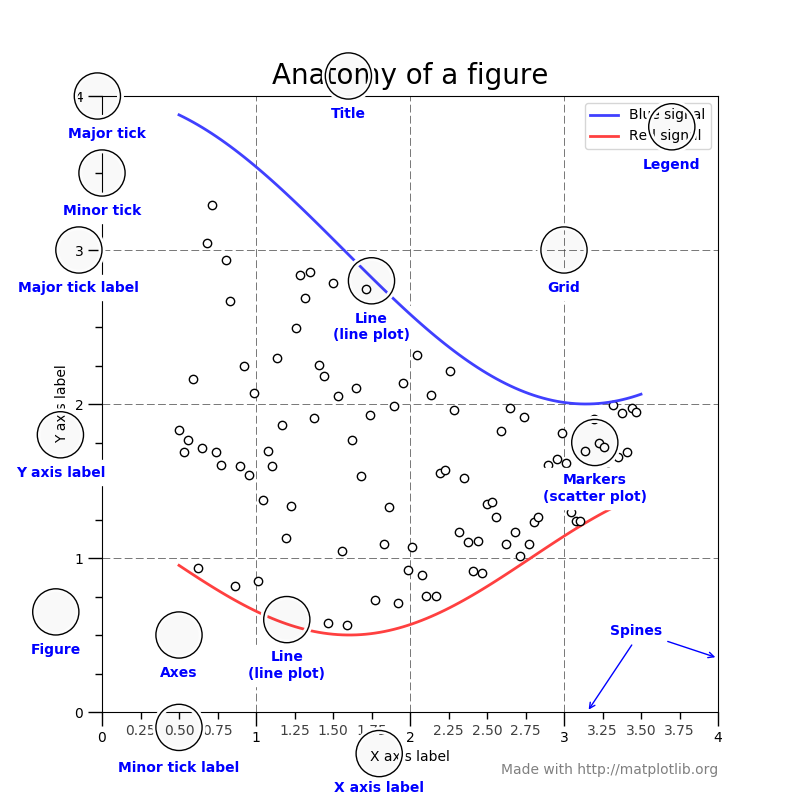

- Figure : 전체 figure, 여러 axes를 포함할 수 있음
- Axes : 한장의 plot
- Axis : x축, y축
- Artist : 한장의 plot에 포함되는 구성요소 전부


## 그리는 방법 두가지

1. 위처럼 plt.plot () 

2. 객체 정의 후 method 호출

    fig, ax = plt.subplots()

    ax.메소드()


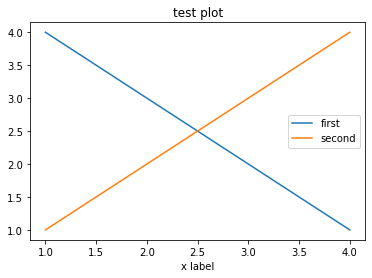

In [55]:
fig, ax = plt.subplots()
ax.plot ( [1,2,3,4], [4,3,2,1], label="first")
ax.plot ([1,2,3,4], [1,2,3,4], label="second")
ax.set_xlabel('x label')
ax.set_title("test plot")
ax.legend()

## interactive mode

method 실행시 마다 update
그 외에도 확대 등 여러가지 widget 사용 가능

1. ipympl 설치 

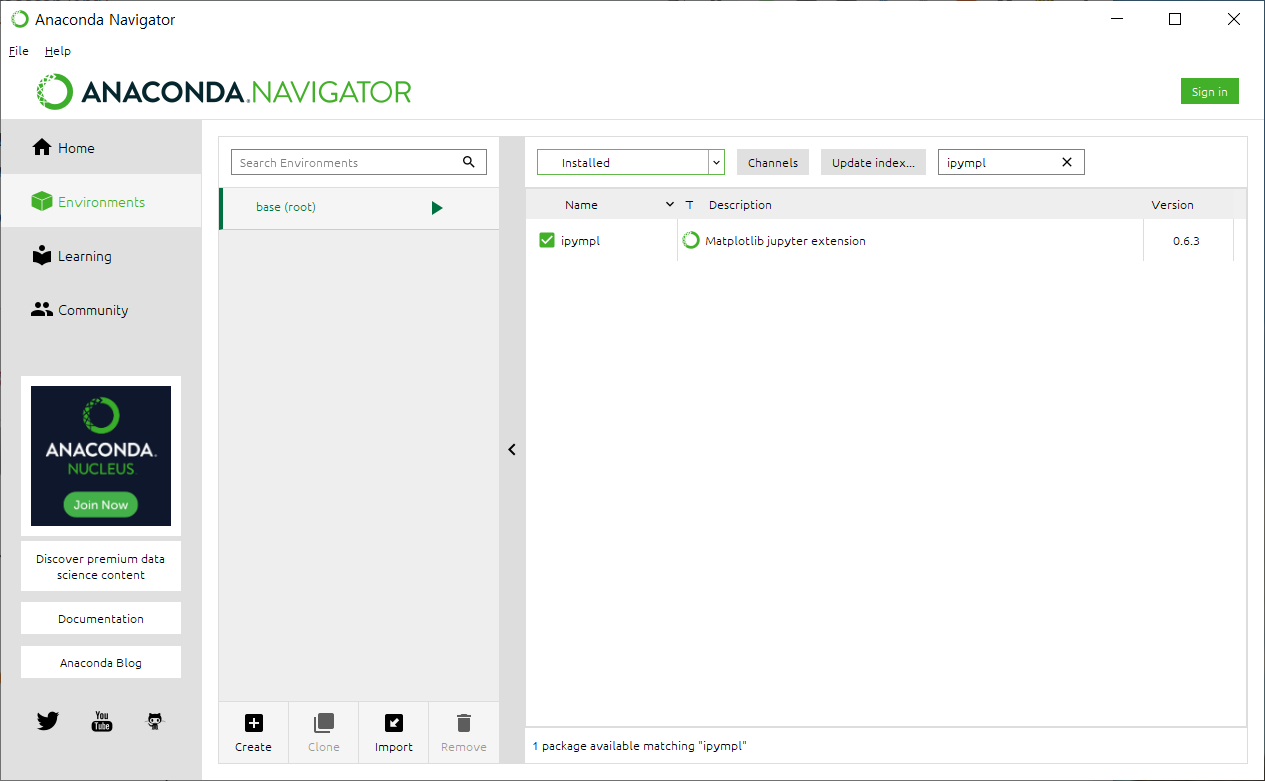

2. notebook에서 interactive mode 켜기

    %matplotlib notebook


3. interactive mode 끄기

    %matplotlib inline

<IPython.core.display.Javascript object>


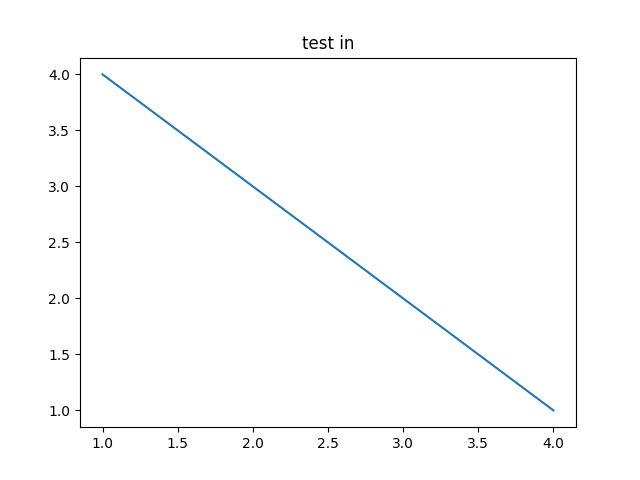

In [56]:
%matplotlib notebook

plt.title("test in")
plt.draw()

In [57]:
plt.plot( [1,2,3,4], [4,3,2,1])


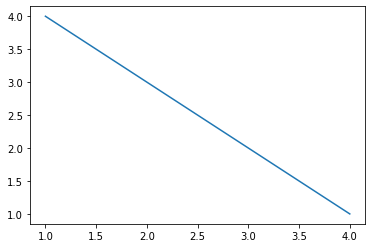

In [58]:
%matplotlib inline

plt.plot( [1,2,3,4], [4,3,2,1])


## pyplot

### plot type

 "ro"  red circle 
 
 "b-"  solid blue line default
 
 "r--"  red dasesh
 
 "bs" blue squares
 
 "g^" green trianles

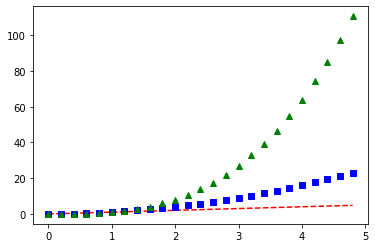

In [59]:
import numpy as np
t = np.arange(0., 5., 0.2)  # 0~ 5까지 0.2 간격으로

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

## categorical variables 

subplot ( ) : 하나의 axes를 만듦

bar (), scatter (), plot ()  각기 다른 모양  plot ()의 파라메터로도 표현 가능


Text(0.5, 0.98, 'Categorical Plotting')

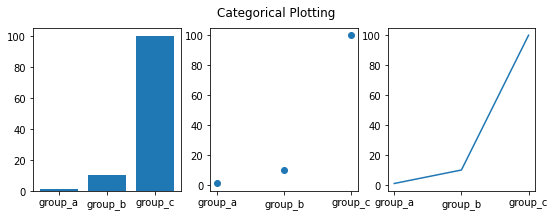

In [60]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

## 과제 5 : studentlist의 혈액형 별 도수를 bar 차트로 그리시오

<BarContainer object of 4 artists>

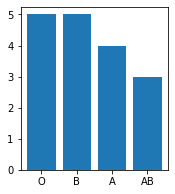

In [20]:
values = df["bloodtype"].value_counts()
name = values.keys()

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(name, values)

<BarContainer object of 4 artists>

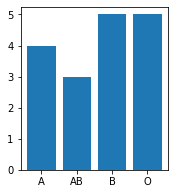

In [21]:
values1 = df.groupby("bloodtype").size()
name1 = values1.keys()

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(name1, values1)

### 2가지 이상의 정보를 2차원에 표시

scatter ( x, y, c=유형별 컬러, s=사이즈, data= label을 가진 원본 데이터)

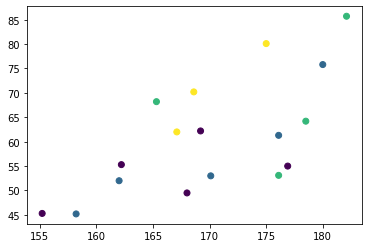

In [63]:
plt.scatter (  "height", "weight", c="grade" ,data=df)

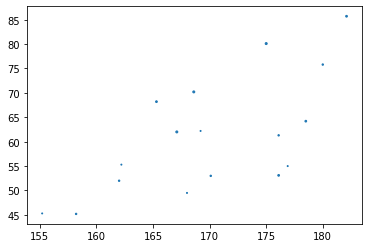

In [64]:
plt.scatter (  "height", "weight", s="grade" ,data=df)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      O
1     AB
2      B
3     AB
4      A
5      O
6      O
7      A
8      B
9      B
10     O
11    AB
12     A
13     O
14     B
15     B
16     A
Name: bloodtype, dtype: object

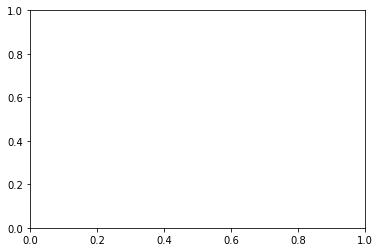

In [65]:
plt.scatter (  "height", "weight", s="grade",  c="bloodtype",data=df)
# error 발생 : color 값을 줘야 
# 원래값과 color의 mapping을 통해 해결

### pandas apply : 함수 적용

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds )

예) df["weight"].apply(np.sqrt)

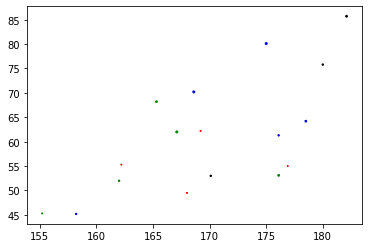

In [66]:
# mapping  활용 

colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}

plt.scatter (  "height", "weight", s="grade", c=df['bloodtype'].apply(lambda x: colors[x]), data=df )


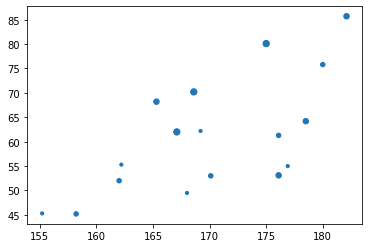

In [67]:
# 응용
plt.scatter (  "height", "weight", s=df["grade"].apply(lambda x: x*10) ,data=df)

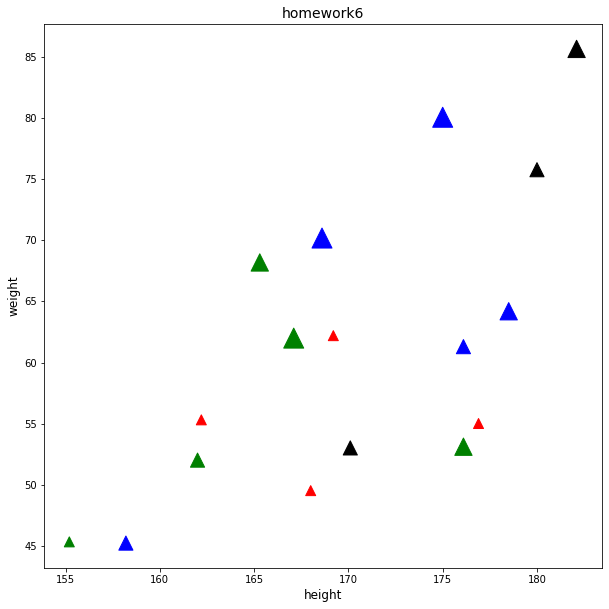

In [68]:
colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}
plt.figure(figsize=(10,10))

plt.scatter ("height", "weight", s=df["grade"].apply(lambda x: x*100),c=df['bloodtype'].apply(lambda x: colors[x]),marker='^' ,data=df)
plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()

### 도형 모양 : marker= "+" or "x" ... 

마커 종류

https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers


## 과제 6 : 학년, 성별, 혈액형에 따른 키, 몸무게 분포를 plot 하시오

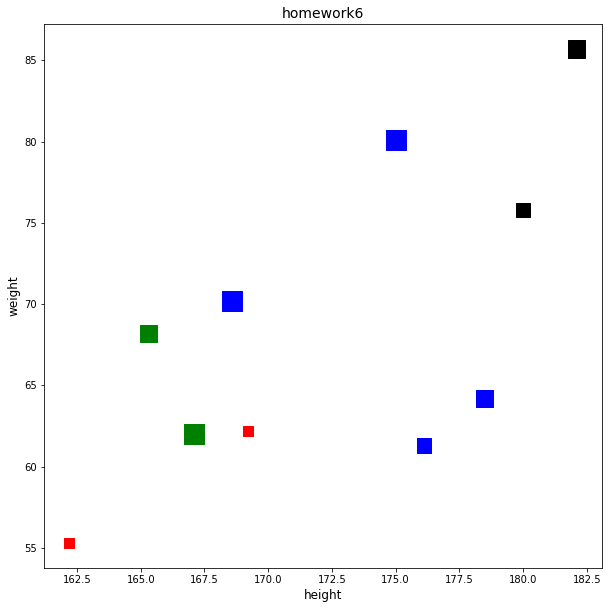

In [124]:
colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}
df_m = df[df['gender']=="남자"]


plt.figure(figsize=(10,10))
plt.scatter ('height','weight', s=df_m["grade"].apply(lambda x: x*100), 
                     c=df_m['bloodtype'].apply(lambda x: colors[x]), marker='s',data=df_m)

plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()

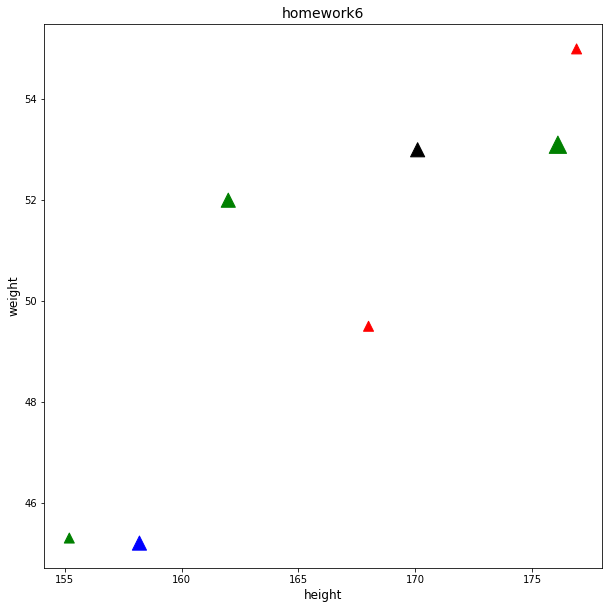

In [126]:
colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}
df_w = df[df['gender']=="여자"]


plt.figure(figsize=(10,10))
plt.scatter ('height','weight', s=df_w["grade"].apply(lambda x: x*100), 
                     c=df_w['bloodtype'].apply(lambda x: colors[x]), marker='^',data=df_w)

plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()

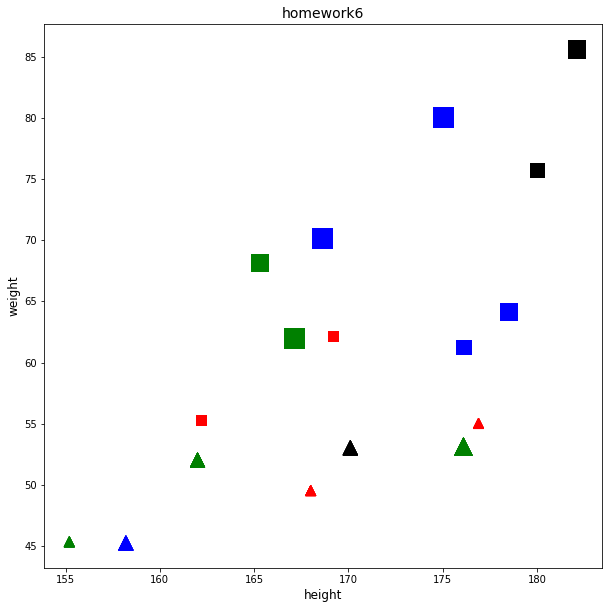

In [127]:
colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}
df_m = df[df['gender']=="남자"]
df_w = df[df['gender']=="여자"]
groups = df['gender']


plt.figure(figsize=(10,10))
for sex in groups:
    if sex == '남자':
        plt.scatter ('height','weight', s=df_m["grade"].apply(lambda x: x*100), 
                             c=df_m['bloodtype'].apply(lambda x: colors[x]), marker='s',data=df_m)
    else:
        plt.scatter ('height','weight', s=df_w["grade"].apply(lambda x: x*100), 
                     c=df_w['bloodtype'].apply(lambda x: colors[x]), marker='^',data=df_w)

plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()

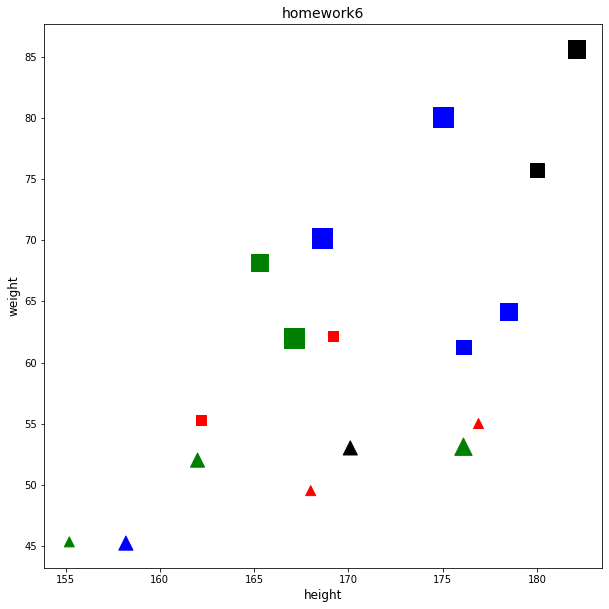

In [128]:
colors = {'A':'red', 'B':'blue', 'O':'green', 'AB':'black'}
df_m = df[df['gender']=="남자"]
df_w = df[df['gender']=="여자"]
groups = df['gender']


plt.figure(figsize=(10,10))
plt.scatter ('height','weight', s=df_m["grade"].apply(lambda x: x*100), 
                             c=df_m['bloodtype'].apply(lambda x: colors[x]), marker='s',data=df_m)
plt.scatter ('height','weight', s=df_w["grade"].apply(lambda x: x*100), 
                     c=df_w['bloodtype'].apply(lambda x: colors[x]), marker='^',data=df_w)

plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


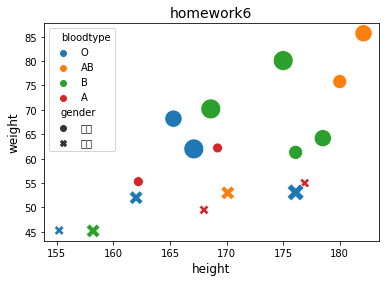

In [110]:
import seaborn as sns
import matplotlib 
matplotlib.font_manager._rebuild()

sns.scatterplot(x='height', 
                y='weight', 
                hue='bloodtype', # different colors by group
                style='gender', # different shapes by group
                s=df["grade"].apply(lambda x: x*100),
                data=df)

plt.title("homework6", fontsize=14)
plt.xlabel("height", fontsize=12)
plt.ylabel("weight", fontsize=12)
plt.show()